### Visualize the Air Quality Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Reading the Data

In [9]:
df = pd.read_csv("countries.csv")
print(df.head())
print(df.info())

  code       name              datetimeFirst               datetimeLast  \
0   ID  Indonesia  2016-01-30 01:00:00+00:00  2024-10-17 10:00:00+00:00   
1   MY   Malaysia  2022-11-03 21:00:00+00:00  2024-10-17 10:00:00+00:00   
2   CL      Chile  2016-01-30 01:00:00+00:00  2024-10-17 10:00:00+00:00   
3   PE       Peru  2016-03-04 17:00:00+00:00  2024-10-17 10:00:00+00:00   
4   AR  Argentina  2016-01-01 03:00:00+00:00  2024-10-18 03:00:00+00:00   

            time_diff  parameter_count  \
0  3183 days 09:00:00               14   
1   713 days 13:00:00                6   
2  3183 days 09:00:00               10   
3  3148 days 17:00:00               14   
4  3213 days 00:00:00               15   

                                     parameter_names  
0  ['pm10', 'pm25', 'o3', 'o3', 'bc', 'no2', 'pm1...  
1  ['pm10', 'pm25', 'pm1', 'relativehumidity', 't...  
2  ['pm10', 'pm25', 'o3', 'co', 'no2', 'so2', 'pm...  
3  ['pm10', 'pm25', 'o3', 'co', 'no2', 'so2', 'no...  
4  ['pm10', 'pm25', '

#### Fixing Column Types

In [10]:
df["code"] = df["code"].astype('category')
df["name"] = df["name"].astype('category')
df["datetimeFirst"] = df["datetimeFirst"].apply(lambda x: pd.Timestamp(x, tz="UTC"))
df["datetimeFirst"] = pd.to_datetime(df["datetimeFirst"], utc=True, errors="coerce")
df["datetimeLast"] = df["datetimeLast"].apply(lambda x: pd.Timestamp(x, tz="UTC"))
df["datetimeLast"] = pd.to_datetime(df["datetimeLast"], utc=True, errors="coerce")
df["time_diff"] = df["datetimeLast"] - df["datetimeFirst"]
df["time_diff"] = df["time_diff"].dt.days
df["parameter_count"] = df["parameter_count"].astype("int")
df["parameter_names"] = df["parameter_names"].astype("str")

df = df[["code", "name", "datetimeFirst", "datetimeLast", "time_diff", "parameter_count", "parameter_names"]]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   code             131 non-null    category           
 1   name             131 non-null    category           
 2   datetimeFirst    131 non-null    datetime64[ns, UTC]
 3   datetimeLast     131 non-null    datetime64[ns, UTC]
 4   time_diff        131 non-null    int64              
 5   parameter_count  131 non-null    int64              
 6   parameter_names  131 non-null    object             
dtypes: category(2), datetime64[ns, UTC](2), int64(2), object(1)
memory usage: 15.9+ KB
None


In [11]:
print(df.head())

  code       name             datetimeFirst              datetimeLast  \
0   ID  Indonesia 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   
1   MY   Malaysia 2022-11-03 21:00:00+00:00 2024-10-17 10:00:00+00:00   
2   CL      Chile 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   
3   PE       Peru 2016-03-04 17:00:00+00:00 2024-10-17 10:00:00+00:00   
4   AR  Argentina 2016-01-01 03:00:00+00:00 2024-10-18 03:00:00+00:00   

   time_diff  parameter_count  \
0       3183               14   
1        713                6   
2       3183               10   
3       3148               14   
4       3213               15   

                                     parameter_names  
0  ['pm10', 'pm25', 'o3', 'o3', 'bc', 'no2', 'pm1...  
1  ['pm10', 'pm25', 'pm1', 'relativehumidity', 't...  
2  ['pm10', 'pm25', 'o3', 'co', 'no2', 'so2', 'pm...  
3  ['pm10', 'pm25', 'o3', 'co', 'no2', 'so2', 'no...  
4  ['pm10', 'pm25', 'o3', 'co', 'no2', 'so2', 'no...  


In [12]:
strings_to_remove = ["[", "]", "'", " "]
for string in strings_to_remove:
    df["parameter_names"] = df["parameter_names"].str.replace(string, "")

df = df.join(df["parameter_names"].str.get_dummies(sep=","))
df = df.drop(columns=["parameter_names"])
print(df.head())

  code       name             datetimeFirst              datetimeLast  \
0   ID  Indonesia 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   
1   MY   Malaysia 2022-11-03 21:00:00+00:00 2024-10-17 10:00:00+00:00   
2   CL      Chile 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   
3   PE       Peru 2016-03-04 17:00:00+00:00 2024-10-17 10:00:00+00:00   
4   AR  Argentina 2016-01-01 03:00:00+00:00 2024-10-18 03:00:00+00:00   

   time_diff  parameter_count  bc  co  co2  humidity  no  no2  nox  o3  pm1  \
0       3183               14   1   0    1         0   1    1    0   1    1   
1        713                6   0   0    0         0   0    0    0   0    1   
2       3183               10   0   1    0         0   0    1    0   1    1   
3       3148               14   0   1    0         0   0    1    0   1    1   
4       3213               15   0   1    0         0   1    1    1   1    1   

   pm10  pm25  pm25-old  pm4  pressure  relativehumidity  so2  temperature  \
0     1 

In [13]:
df["parameter_count"] = df.iloc[:, 6:].sum(axis=1)
print(df.head())

  code       name             datetimeFirst              datetimeLast  \
0   ID  Indonesia 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   
1   MY   Malaysia 2022-11-03 21:00:00+00:00 2024-10-17 10:00:00+00:00   
2   CL      Chile 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   
3   PE       Peru 2016-03-04 17:00:00+00:00 2024-10-17 10:00:00+00:00   
4   AR  Argentina 2016-01-01 03:00:00+00:00 2024-10-18 03:00:00+00:00   

   time_diff  parameter_count  bc  co  co2  humidity  no  no2  nox  o3  pm1  \
0       3183               12   1   0    1         0   1    1    0   1    1   
1        713                6   0   0    0         0   0    0    0   0    1   
2       3183               10   0   1    0         0   0    1    0   1    1   
3       3148               10   0   1    0         0   0    1    0   1    1   
4       3213               12   0   1    0         0   1    1    1   1    1   

   pm10  pm25  pm25-old  pm4  pressure  relativehumidity  so2  temperature  \
0     1 

#### Finding the Largest and Smallest Values

In [14]:
max_parameters = df["parameter_count"].max()
country_with_max_parameters = df[df["parameter_count"] == max_parameters]
min_parameters = df["parameter_count"].min()
country_with_min_parameters = df[df["parameter_count"] == min_parameters]
print(f"Country with maximum parameters: {country_with_max_parameters}")
print(f"Country with minimum parameters: {country_with_min_parameters}")

Country with maximum parameters:     code           name             datetimeFirst              datetimeLast  \
106   US  United States 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   

     time_diff  parameter_count  bc  co  co2  humidity  no  no2  nox  o3  pm1  \
106       3183               16   1   1    1         0   1    1    1   1    1   

     pm10  pm25  pm25-old  pm4  pressure  relativehumidity  so2  temperature  \
106     1     1         1    0         1                 1    1            1   

     um003  um025  
106      1      0  
Country with minimum parameters:     code                              name                    datetimeFirst  \
11    ET                          Ethiopia        2016-08-18 23:00:00+00:00   
18    CR                        Costa Rica        2019-10-28 18:00:00+00:00   
19    CD  Democratic Republic of the Congo        2022-06-16 17:00:00+00:00   
44    AZ                        Azerbaijan        2022-06-23 13:00:00+00:00   
50    MC        

In [15]:
countries_selected_with_parameters = df[df["parameter_count"] > 13]
print(f"Countries with more than 13 parameters: {countries_selected_with_parameters}")

Countries with more than 13 parameters:     code           name             datetimeFirst              datetimeLast  \
47    ES          Spain 2016-11-17 23:00:00+00:00 2024-10-17 10:59:00+00:00   
80    BG       Bulgaria 2020-04-20 18:00:00+00:00 2024-10-17 10:59:00+00:00   
106   US  United States 2016-01-30 01:00:00+00:00 2024-10-17 10:00:00+00:00   

     time_diff  parameter_count  bc  co  co2  humidity  no  no2  nox  o3  pm1  \
47        2890               15   0   1    0         1   1    1    1   1    1   
80        1640               14   0   1    0         1   1    1    0   1    1   
106       3183               16   1   1    1         0   1    1    1   1    1   

     pm10  pm25  pm25-old  pm4  pressure  relativehumidity  so2  temperature  \
47      1     1         0    1         1                 1    1            1   
80      1     1         0    1         1                 1    1            1   
106     1     1         1    0         1                 1    1            1  

In [17]:
largest_time_diff = df["time_diff"].max()
country_with_largest_time_diff = df[df["time_diff"] == largest_time_diff]
smallest_time_diff = df["time_diff"].min()
country_with_smallest_time_diff = df[df["time_diff"] == smallest_time_diff]
print(f"Country with largest time difference: {country_with_largest_time_diff}")
print(f"Country with smallest time difference: {country_with_smallest_time_diff}")

Country with largest time difference:   code       name             datetimeFirst              datetimeLast  \
4   AR  Argentina 2016-01-01 03:00:00+00:00 2024-10-18 03:00:00+00:00   

   time_diff  parameter_count  bc  co  co2  humidity  no  no2  nox  o3  pm1  \
4       3213               12   0   1    0         0   1    1    1   1    1   

   pm10  pm25  pm25-old  pm4  pressure  relativehumidity  so2  temperature  \
4     1     1         0    0         0                 1    1            1   

   um003  um025  
4      1      0  
Country with smallest time difference:    code    name             datetimeFirst              datetimeLast  \
50   MC  Monaco 2023-09-25 16:11:07+00:00 2023-09-25 16:46:07+00:00   

    time_diff  parameter_count  bc  co  co2  humidity  no  no2  nox  o3  pm1  \
50          0                1   0   0    0         0   0    0    0   0    0   

    pm10  pm25  pm25-old  pm4  pressure  relativehumidity  so2  temperature  \
50     0     1         0    0         0  

#### Visualizing the Data

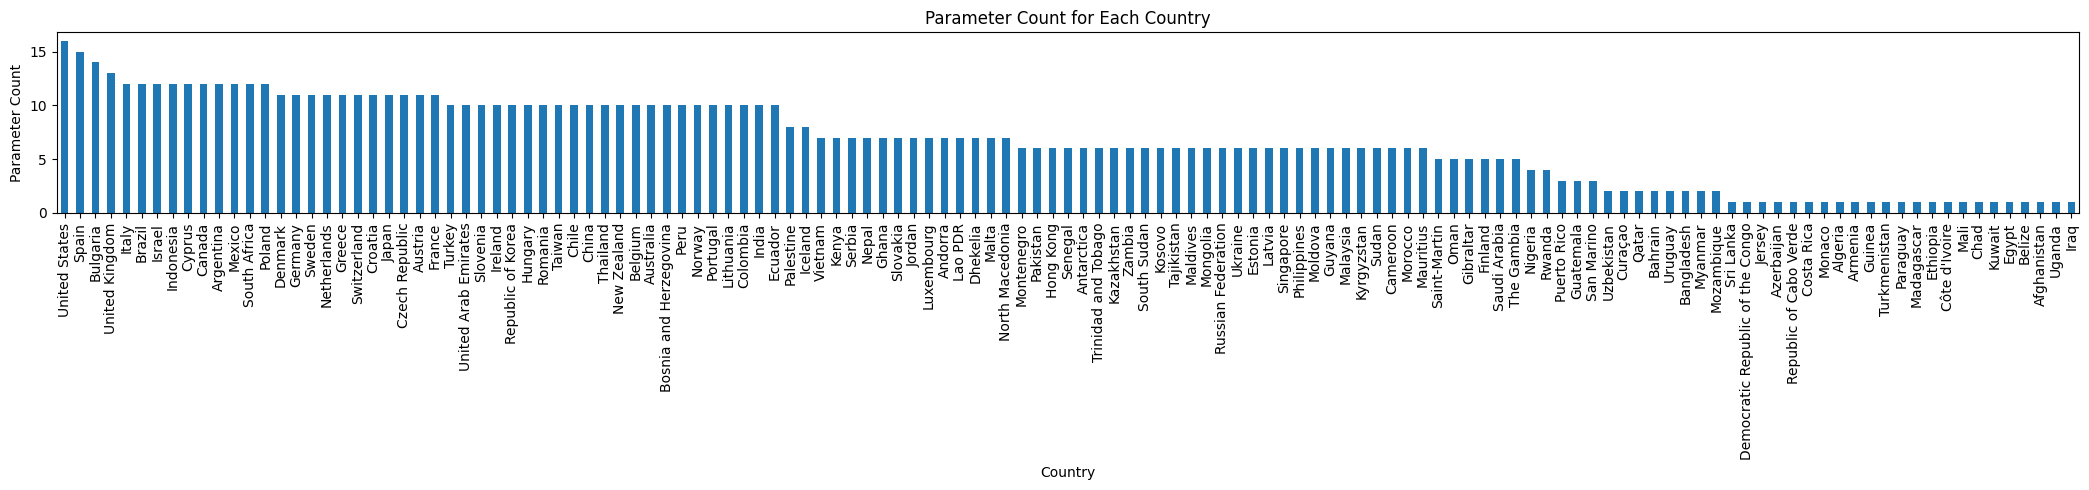

In [19]:
df_sorted_by_parameters = df.sort_values(by="parameter_count", ascending=False)

df_sorted_by_parameters.plot(x="name", y="parameter_count", kind="bar", figsize=(21, 5))
plt.title("Parameter Count for Each Country")
plt.xlabel("Country")
plt.ylabel("Parameter Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend().set_visible(False)
plt.savefig("parameter_count_for_each_country.png")
plt.show()

/var/folders/0l/jh7543nx7fd7c813pmj1dz4h0000gn/T/ipykernel_31833/1515252014.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


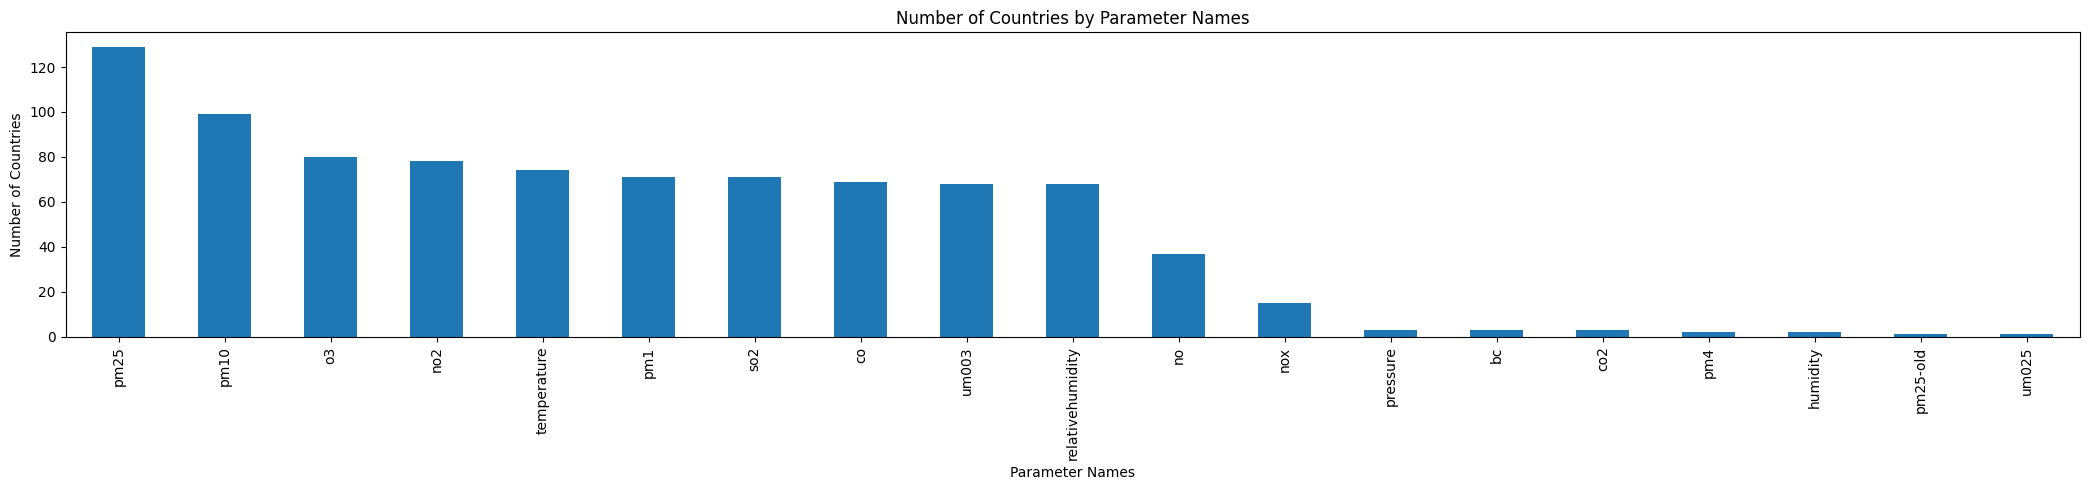

In [20]:
parameter_names = df.columns[6:]
parameter_count = df[parameter_names].sum()
parameter_count = parameter_count.sort_values(ascending=False)
parameter_count.plot(kind="bar", figsize=(21, 5))
plt.title("Number of Countries by Parameter Names")
plt.xlabel("Parameter Names")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend().set_visible(False)
plt.savefig("number_of_countries_by_parameter_names.png")
plt.show()